In [1]:
import numpy as np
from types import SimpleNamespace
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# Import additional libraries: 

# Consumption saving with borrowing

We are now considering the consumption-savings model with an extension: households may **borrow** money in the first period. Additionally, there are **2 kinds** of households: the first type will likely see a **low level** of period 2 income, whereas the second type will likely see a **high** second period income. 

A household lives for 2 periods and makes decisions on consumption and saving in each period.  

**Second period:**   
Solving the consumer problem in the second period is similar to the baseline case we have seen before.

The household gets utility from **consuming** and **leaving a bequest** (warm glow),

$$
\begin{aligned}
v_{2}(m_{2})&= \max_{c_{2}}\frac{c_{2}^{1-\rho}}{1-\rho}+\nu\frac{(a_2+\kappa)^{1-\rho}}{1-\rho}\\
\text{s.t.} \\
a_2 &= m_2-c_2 \\
a_2 &\geq 0
\end{aligned}
$$

where
* $m_t$ is cash-on-hand 
* $c_t$ is consumption
* $a_t$ is end-of-period assets 
* $\rho > 1$ is the risk aversion coefficient
* $\nu > 0 $ is the strength of the bequest motive
* $\kappa > 0$ is the degree of luxuriousness in the bequest motive  
* $a_2\geq0$ ensures the household *cannot* die in debt

**First period:**   
The household gets utility from immediate consumption.  Household takes into account that next period income is stochastic.

$$
\begin{aligned}
v_1(m_1)&=\max_{c_1}\frac{c_{1}^{1-\rho}}{1-\rho}+\beta\mathbb{E}_{1}\left[v_2(m_2)\right]\\&\text{s.t.}&\\
a_1 & = m_1 - c_1 \\
m_2 & = (1+r)a_1 + y_2 \\
y_{2} & = \begin{cases}
1 - \Delta & \text{with prob. } P_{low}\\
1 + \Delta & \text{with prob. } P_{high} 
\end{cases}\\
a_1 & > -\frac{1-\Delta}{1+r} 
\end{aligned}
$$

where
* $\beta > 0$ is the discount factor
* $\mathbb{E}_1$ is the expectation operator conditional on information in period 1
* $y_2$ is income in period 2
* $\Delta \in (0,1)$ is the level of income risk 
* $r$ is the interest rate
* $\frac{1-\Delta}{1+r} > c_1 - m_1$ ensures the household cannot borrow *more* than it will be able to repay in next period when $y_2$ is received.

The **2 types** of households are defined by their different $(P_{low},P_{high})$:
* Type 1: 
    * $P_{low} = 0.9$ 
    * $P_{high} = 0.1$
* Type 2:
    * $P_{low} = 0.1$ 
    * $P_{high} = 0.9$

In [2]:
# Parameters

# Add income prb parameters

# Tip: for each household type, create a SimpleNamespace 
# or dictionary for storing all the parameters 
Type1 = SimpleNamespace()
Type1.y_prb_low = 0.9
Type1.rho = 3
Type1.kappa = 0.5
Type1.nu = 0.1
Type1.r = 0.04
Type1.beta = 0.95
Type1.Delta = 0.5
Type1.max_debt = (1-Type1.Delta)/(1+Type1.r)

Type2 = SimpleNamespace(**vars(Type1))
Type2.y_prb_low = 0.1

**Question 1** Solve the model for each type of household. Plot the value functions $v_1(m_1)$ and $v_2(m_2)$ in one graph for each household type. Comment on the differences.

In [3]:
from ConsumptionSavingexam2021 import ConsumptionSavingModel

# Create model instances
model1 = ConsumptionSavingModel(Type1)
model2 = ConsumptionSavingModel(Type2)

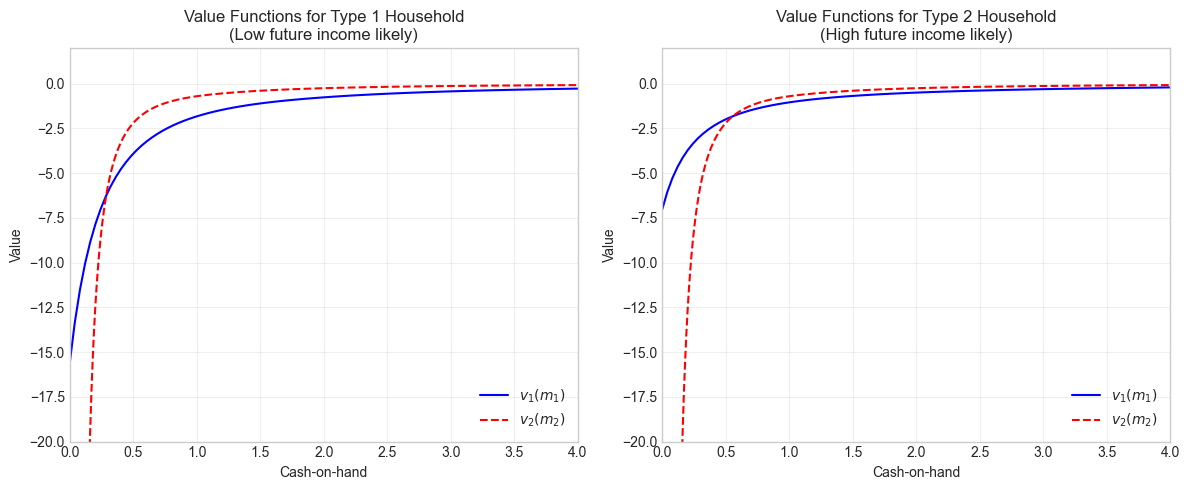

(<Figure size 1200x500 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Value Functions for Type 1 Household\n(Low future income likely)'}, xlabel='Cash-on-hand', ylabel='Value'>,
        <AxesSubplot:title={'center':'Value Functions for Type 2 Household\n(High future income likely)'}, xlabel='Cash-on-hand', ylabel='Value'>],
       dtype=object))

In [4]:
import matplotlib.pyplot as plt

def plot_value_functions(model_type1, model_type2):
    """
    Plot value functions v₁(m₁) and v₂(m₂) for both household types
    
    Args:
        model_type1: Solved ConsumptionSavingModel for household type 1
        model_type2: Solved ConsumptionSavingModel for household type 2
    """
    # Solve models if not already solved
    m1_t1, c1_t1, v1_t1, m2_t1, c2_t1, v2_t1 = model_type1.solve()
    m1_t2, c1_t2, v1_t2, m2_t2, c2_t2, v2_t2 = model_type2.solve()
    
    # Create figure with 1 row and 2 columns
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot for Type 1 (Left panel)
    axes[0].plot(m1_t1, v1_t1, 'b-', label='$v_1(m_1)$')
    axes[0].plot(m2_t1, v2_t1, 'r--', label='$v_2(m_2)$')
    axes[0].set_xlabel('Cash-on-hand')
    axes[0].set_ylabel('Value')
    axes[0].set_title('Value Functions for Type 1 Household\n(Low future income likely)')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    axes[0].set_xlim([0,4])
    axes[0].set_ylim([-20, 2])
    
    # Plot for Type 2 (Right panel)
    axes[1].plot(m1_t2, v1_t2, 'b-', label='$v_1(m_1)$')
    axes[1].plot(m2_t2, v2_t2, 'r--', label='$v_2(m_2)$')
    axes[1].set_xlabel('Cash-on-hand')
    axes[1].set_ylabel('Value')
    axes[1].set_title('Value Functions for Type 2 Household\n(High future income likely)')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    axes[1].set_xlim([0,4])
    axes[1].set_ylim([-20, 2])
    
    plt.tight_layout()
    plt.show()
    
    # Optional: Return the figure for further customization
    return fig, axes

plot_value_functions(model1, model2)


**Question 2** From the model solution, obtain the optimal consumption functions $c_1^*(m_1)$ and $c_2^*(m_2)$. Plot these in one graph for each type of household. Comment on the observed differences between household types. 

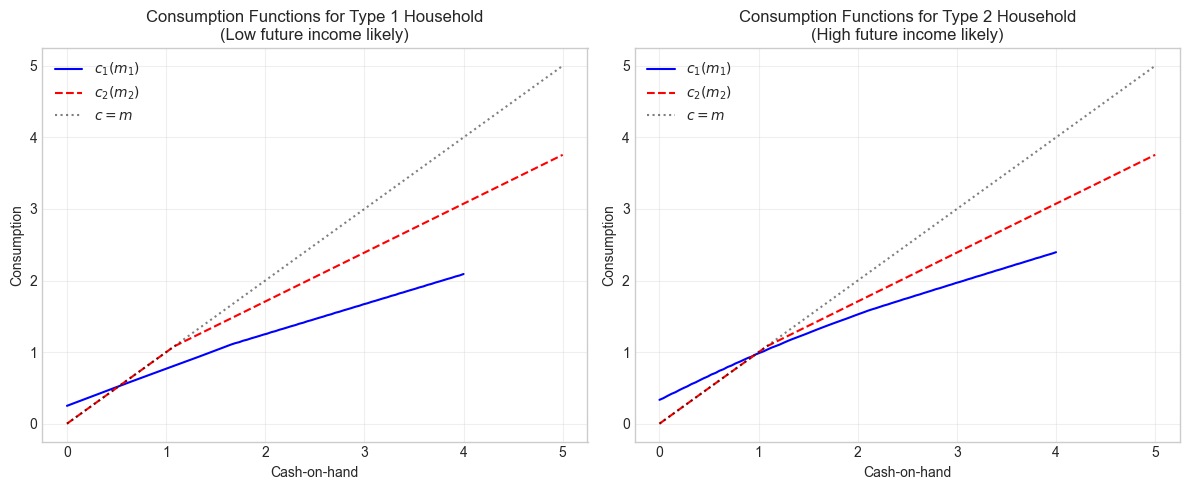

(<Figure size 1200x500 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Consumption Functions for Type 1 Household\n(Low future income likely)'}, xlabel='Cash-on-hand', ylabel='Consumption'>,
        <AxesSubplot:title={'center':'Consumption Functions for Type 2 Household\n(High future income likely)'}, xlabel='Cash-on-hand', ylabel='Consumption'>],
       dtype=object))

In [5]:

def plot_consumption_functions(model_type1, model_type2):
    """
    Plot consumption functions c₁(m₁) and c₂(m₂) for both household types
    
    Args:
        model_type1: Solved ConsumptionSavingModel for household type 1
        model_type2: Solved ConsumptionSavingModel for household type 2
    """
    # Solve models if not already solved
    m1_t1, c1_t1, v1_t1, m2_t1, c2_t1, v2_t1 = model_type1.solve()
    m1_t2, c1_t2, v1_t2, m2_t2, c2_t2, v2_t2 = model_type2.solve()
    
    # Create figure with 1 row and 2 columns
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot for Type 1 (Left panel)
    axes[0].plot(m1_t1, c1_t1, 'b-', label='$c_1(m_1)$')
    axes[0].plot(m2_t1, c2_t1, 'r--', label='$c_2(m_2)$')
    
    # Add 45-degree line (c=m) to visualize borrowing/saving behavior
    max_m = max(m1_t1.max(), m2_t1.max())
    axes[0].plot([0, max_m], [0, max_m], 'k:', alpha=0.5, label='$c=m$')
    
    axes[0].set_xlabel('Cash-on-hand')
    axes[0].set_ylabel('Consumption')
    axes[0].set_title('Consumption Functions for Type 1 Household\n(Low future income likely)')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Plot for Type 2 (Right panel)
    axes[1].plot(m1_t2, c1_t2, 'b-', label='$c_1(m_1)$')
    axes[1].plot(m2_t2, c2_t2, 'r--', label='$c_2(m_2)$')
    
    # Add 45-degree line (c=m) to visualize borrowing/saving behavior
    max_m = max(m1_t2.max(), m2_t2.max())
    axes[1].plot([0, max_m], [0, max_m], 'k:', alpha=0.5, label='$c=m$')
    
    axes[1].set_xlabel('Cash-on-hand')
    axes[1].set_ylabel('Consumption')
    axes[1].set_title('Consumption Functions for Type 2 Household\n(High future income likely)')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Optional: Return the figure for further customization
    return fig, axes

plot_consumption_functions(model1, model2)

>> the consumption function in period 2 is the same as period 1, cons decides based on current cash on hand and no future income issues. the consumption is higher in period 1 when future income prospects better.  more borrowing in period 2.

>> further,  liq constraint in last period. c limited by m, cannot leave debt for the future.

**Question 3** Simulate `simN` households of each type based on the distribution of $m_1$ below. You can use the same distribution for both household types. What is the fraction of households who *borrow* in period 1, $c_1 > m_1$, in each group?

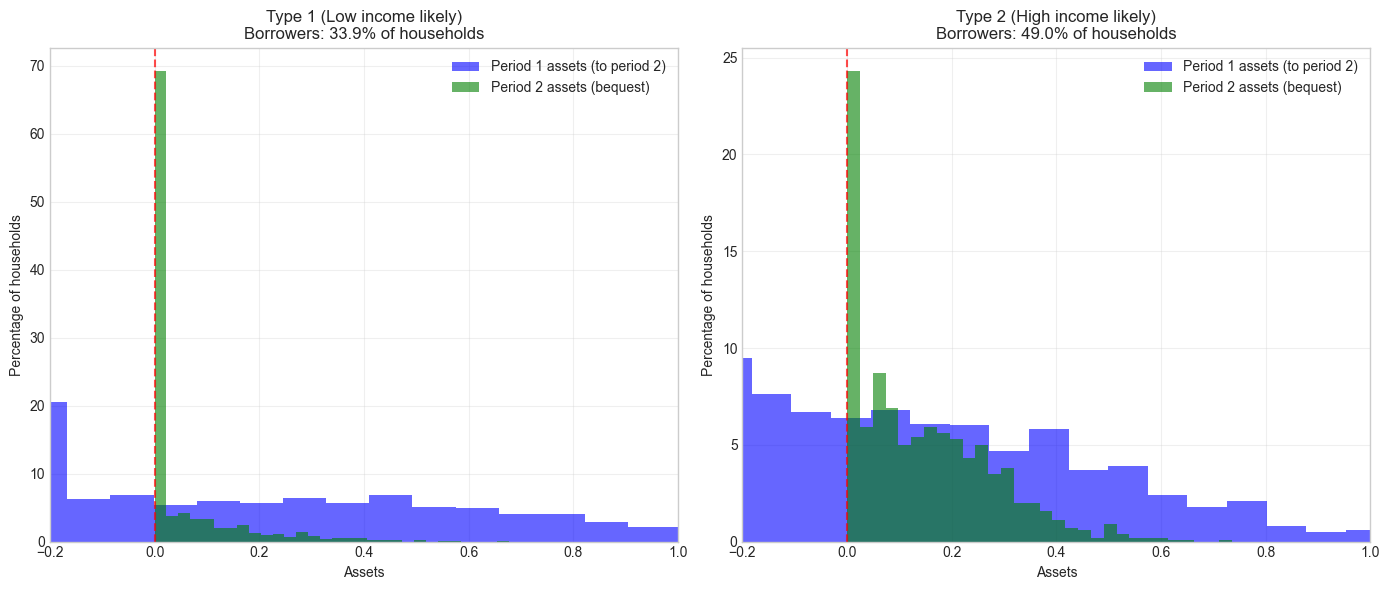

Type 1 households (low income likely):
  - Borrowers in period 1: 33.9%
  - Mean assets carried to period 2: 0.2865
  - Mean bequest: 0.0493

Type 2 households (high income likely):
  - Borrowers in period 1: 49.0%
  - Mean assets carried to period 2: 0.0909
  - Mean bequest: 0.1474


{'type1': {'borrowers_pct': 33.900000000000006,
  'assets_period1': array([ 1.03236006e+00,  5.60746399e-01,  2.78979445e-02, -1.57174654e-01,
          5.02194710e-01, -1.08999283e-01,  8.24123530e-01,  5.44699422e-01,
          2.84315738e-01,  4.38422364e-01,  2.93060690e-01, -1.72165070e-01,
          4.32156238e-01,  2.82515681e-01, -2.49446012e-01,  8.08087525e-01,
         -2.49446012e-01,  1.21842315e-01, -2.49446012e-01,  3.81431453e-01,
         -1.15988123e-01,  1.64540492e+00,  9.33248622e-01,  2.67717656e-01,
          1.06678929e-01,  2.99847010e-01,  8.33206220e-01,  9.68010840e-01,
          2.27253458e-03,  4.87033426e-01,  1.03039847e+00,  1.02889935e+00,
          5.92372576e-01,  4.16590350e-02,  3.69194585e-01,  2.57535803e-01,
         -2.49446012e-01,  1.52920757e-01, -2.49446012e-01,  4.09556953e-01,
          3.50087280e-01,  4.64965742e-01,  3.34697489e-01,  7.01402226e-01,
         -2.49446012e-01,  8.78918017e-01, -3.27675252e-02,  6.94855560e-01,
         -

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_and_plot_wealth_distribution(model1, model2, simN=1000):
    """
    Simulate households of each type and plot wealth distributions
    
    Args:
        model1: ConsumptionSavingModel for household type 1
        model2: ConsumptionSavingModel for household type 2
        simN: Number of households to simulate
    """
    # Set random seed for reproducibility
    np.random.seed(2021)
    
    # Generate initial m1 distribution - same for both types
    sim_m1 = np.fmax(np.random.normal(1, 1, size=simN), 0)
    
    # Assign to models
    model1.sim_m1 = sim_m1
    model2.sim_m1 = sim_m1
    
    # Simulate choices for both models
    sim_c1_t1, sim_c2_t1, sim_m2_t1 = model1.simulate()
    sim_c1_t2, sim_c2_t2, sim_m2_t2 = model2.simulate()
    
    # Calculate assets
    # Period 1 end-of-period assets (carried to period 2)
    sim_a1_t1 = sim_m1 - sim_c1_t1
    sim_a1_t2 = sim_m1 - sim_c1_t2
    
    # Period 2 end-of-period assets (bequests)
    sim_a2_t1 = sim_m2_t1 - sim_c2_t1
    sim_a2_t2 = sim_m2_t2 - sim_c2_t2
    
    # Calculate fraction of borrowers in period 1
    borrowers_t1 = np.mean(sim_c1_t1 > sim_m1) * 100
    borrowers_t2 = np.mean(sim_c1_t2 > sim_m1) * 100
    
    # Create figure
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Set common parameters for histograms
    bins = 30
    alpha = 0.6
    
    # Type 1 distribution plot (left panel)
    axes[0].hist(sim_a1_t1, bins=bins, alpha=alpha, color='blue', 
                 label='Period 1 assets (to period 2)', weights=np.ones_like(sim_a1_t1)/len(sim_a1_t1)*100)
    axes[0].hist(sim_a2_t1, bins=bins, alpha=alpha, color='green', 
                 label='Period 2 assets (bequest)', weights=np.ones_like(sim_a2_t1)/len(sim_a2_t1)*100)
    axes[0].axvline(x=0, color='red', linestyle='--', alpha=0.7)
    axes[0].set_xlabel('Assets')
    axes[0].set_ylabel('Percentage of households')
    axes[0].set_title(f'Type 1 (Low income likely)\nBorrowers: {borrowers_t1:.1f}% of households')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    axes[0].set_xlim(-0.2, 1.0)  # Truncate x-axis to show assets up to 1.0
    
    # Type 2 distribution plot (right panel)
    axes[1].hist(sim_a1_t2, bins=bins, alpha=alpha, color='blue', 
                 label='Period 1 assets (to period 2)', weights=np.ones_like(sim_a1_t2)/len(sim_a1_t2)*100)
    axes[1].hist(sim_a2_t2, bins=bins, alpha=alpha, color='green', 
                 label='Period 2 assets (bequest)', weights=np.ones_like(sim_a2_t2)/len(sim_a2_t2)*100)
    axes[1].axvline(x=0, color='red', linestyle='--', alpha=0.7)
    axes[1].set_xlabel('Assets')
    axes[1].set_ylabel('Percentage of households')
    axes[1].set_title(f'Type 2 (High income likely)\nBorrowers: {borrowers_t2:.1f}% of households')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    axes[1].set_xlim(-0.2, 1.0)  # Truncate x-axis to show assets up to 1.0
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print(f"Type 1 households (low income likely):")
    print(f"  - Borrowers in period 1: {borrowers_t1:.1f}%")
    print(f"  - Mean assets carried to period 2: {np.mean(sim_a1_t1):.4f}")
    print(f"  - Mean bequest: {np.mean(sim_a2_t1):.4f}")
    
    print(f"\nType 2 households (high income likely):")
    print(f"  - Borrowers in period 1: {borrowers_t2:.1f}%")
    print(f"  - Mean assets carried to period 2: {np.mean(sim_a1_t2):.4f}")
    print(f"  - Mean bequest: {np.mean(sim_a2_t2):.4f}")
    
    return {
        'type1': {
            'borrowers_pct': borrowers_t1,
            'assets_period1': sim_a1_t1,
            'assets_period2': sim_a2_t1
        },
        'type2': {
            'borrowers_pct': borrowers_t2,
            'assets_period1': sim_a1_t2,
            'assets_period2': sim_a2_t2
        }
    }
simulate_and_plot_wealth_distribution(model1, model2)